In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Hₒ: p = pₒ

Hₐ: p > pₒ

where p and pₒ stand for the conversion rate of the new and old design, respectively. We’ll also set a confidence level of 95%:

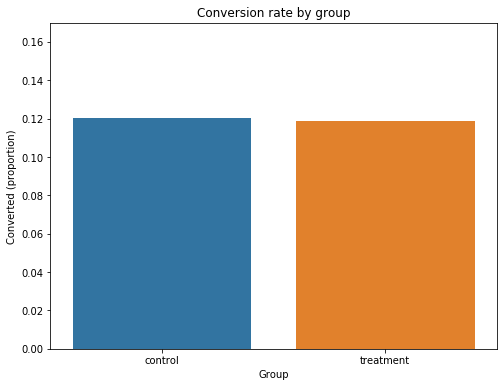

In [8]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['group'], y=df['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group')
plt.xlabel('Group')
plt.ylabel('Converted (proportion)');

In [27]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = df[ab_test['group'] == 'control']['converted']
treatment_results = df[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
noof_sample = [n_con, n_treat] 

z_stat, pval = proportions_ztest( successes, noof_sample,alternative='larger')


print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')


z statistic: 0.83
p-value: 0.204


5. Drawing Conclusion
Since our p-value is above our α=0.05 threshold, we cannot reject the Null hypothesis Hₒ, which means that our new design did not perform significantly different (let alone better) than our old one.